<a href="https://colab.research.google.com/github/TWilly240/Snoasis/blob/main/NewplotofReceiptbyhour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## data cleaned

cleaned data. added month column and removed question marks from time

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/camdenlol/SnOasis/main/snoasisData.csv')

In [7]:
df.tail(25)

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),Subtotal (USD),Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment
76194,11/5/2023,4:14:50?PM,SnOasis Main,37173,Small,NaN,NaN,1,1.0,0.0,1.0,Yes,No,0.09,1.09,NaN,NaN,0.0,NaN
76195,11/5/2023,4:22:22?PM,SnOasis Main,37174,Small,NaN,NaN,5,5.0,0.0,5.0,Yes,No,0.47,5.47,NaN,NaN,0.0,NaN
76196,11/5/2023,4:29:01?PM,SnOasis Main,37175,Small,NaN,NaN,7,7.0,0.0,7.0,Yes,No,0.66,7.66,NaN,NaN,0.0,NaN
76197,11/5/2023,4:35:22?PM,SnOasis Main,37176,Small,NaN,NaN,3,3.0,0.0,3.0,Yes,No,0.28,3.28,NaN,NaN,0.0,NaN
76198,11/5/2023,4:36:47?PM,SnOasis Main,37177,Extra Lime,NaN,NaN,1,1.0,0.0,1.0,Yes,No,0.09,1.09,NaN,NaN,0.0,NaN
76199,11/5/2023,4:37:32?PM,SnOasis Main,37178,Small,NaN,NaN,1,1.0,0.0,1.0,Yes,No,0.09,1.09,NaN,NaN,0.0,NaN
76200,11/5/2023,4:40:37?PM,SnOasis Main,37179,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76201,11/5/2023,4:41:20?PM,SnOasis Main,37180,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76202,11/5/2023,4:43:42?PM,SnOasis Main,37181,Small,NaN,NaN,2,2.0,0.0,2.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN
76203,11/5/2023,4:53:35?PM,SnOasis Main,37182,Small,NaN,NaN,2,2.0,0.0,3.0,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN


In [23]:
df.Time.loc[0][:-3]+" "+df.Time.loc[0][-2:]


'7:50:56 PM'

In [24]:
def getRidOfQuestion(string):
  return string[:-3]+" " +string[-2:]


In [25]:
 df.Time = df.Time.apply(getRidOfQuestion)

In [26]:
df.Date=pd.to_datetime(df.Date, format = '%m/%d/%Y')

In [27]:
df["MonthName"] = df.Date.dt.month_name()

In [28]:
df['Time'] = pd.to_datetime(df['Time'])

# Convert AM/PM time to 24-hour format
#df['Time'] = df['Time'].dt.strftime('%H:%M:%S')


<ipython-input-28-588dd199e6de>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


<Axes: >

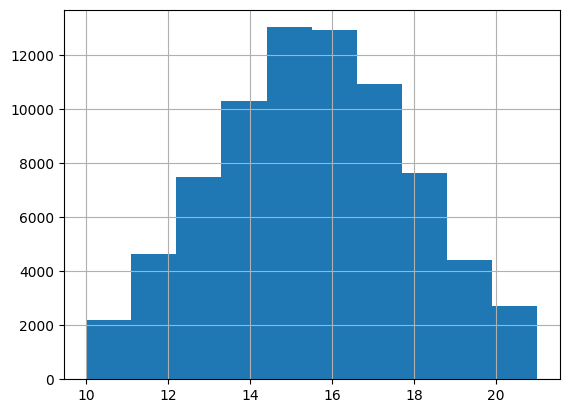

In [14]:
df.Time.dt.hour.hist()

In [15]:
df.groupby('Time')

In [32]:
df['hour'] = df.Time.dt.hour

In [17]:
df[df['Receipt number']==57]['Subtotal (USD)']

95    9.5
96    9.5
97    9.5
Name: Subtotal (USD), dtype: float64

<Axes: xlabel='hour'>

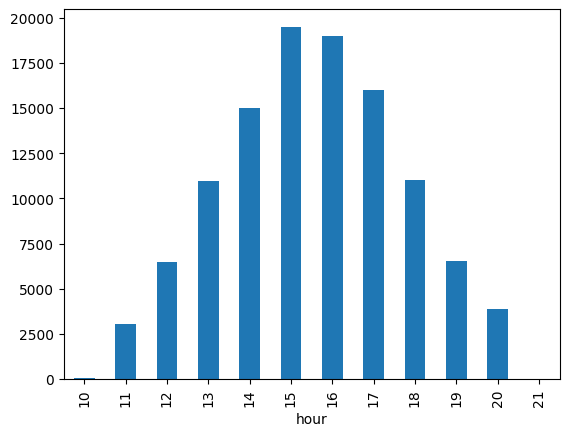

In [18]:
df.groupby('hour').sum("Quantity").Quantity.plot(kind = 'bar')

In [19]:
dgh = df.groupby('Receipt number').sum(numeric_only=True)

In [20]:
dgh.plot(kind = ('bar'))

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b2abf721120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b2abf7203a0> (for post_execute):


KeyboardInterrupt: 

In [1]:
df.groupby('hour').mean('newSubtotal').plot(kind = 'bar')

NameError: name 'df' is not defined

In [ ]:
dfg = df.groupby("Receipt number").sum('Final price (USD)')
dfg.head(60)

In [ ]:
dfg.loc[37182,"Subtotal (USD)"]

verifying that the df combines the receipts correctly (it does)

In [ ]:
dfg["Final price (USD)"].mean()

$13 per ticket on average for the last year (non raised menu prices)

convert to new prices and find new average...new column...dictionary...new prices...redoing whole thing



In [ ]:
dict1 = {"Kiddie": 2.00, "Small": 3.00, "Medium": 3.50, "Large": 4.75, "Extra Large": 5.50}
dict1["Kiddie"]

In [ ]:
df.Name.unique()

In [29]:
dict2 = {'Gift card': 1.00, 'Candy Bar': 1.50, 'Add Nerds': 0.50, 'Add Tajin': 0.50, 'Energy Drink': 2.25,
       'Cup of Gummies': 1.50, 'Test': 5.00, 'Snickers': 1.50, 'Kit Kat': 1.50, 'Skittles': 1.50,
       'Large': 4.75, 'Pickle': 3.00, 'Tips': 1.00, 'Kiddie': 2.00, 'Small': 3.00, 'Medium': 3.50, 'Lime': 0.50,
       'Caramel': 0.50, 'Cream': 0.50, 'Spoon Straw': 2.00, 'Sour Patch Kids': 1.50,'Extra Large': 5.50, 'S M L Salty Dog Charge': 1.00, 'Bottled Water': 1.00,
       'Doritos': 1.00, 'Pickle Pop': 0.75, 'Extra Lime': 1.00, 'Red Bull': 3.00,
       'Kiddie Salty Dog Charge': 0.50, 'Chocolate': 0.50, 'Ruffles': 1.00, 'Pup Cup': 1.00,
       'XL Salty Dog Charge': 1.25, "Reese's": 1.50, 'Tajin': 0.50, 'Cheetos': 1.00, 'Nerds': 0.50,
       'Starburst': 1.50, 'Pop Rocks': 0.50, 'Bang': 3.00, 'Alani': 3.00, '5.31': 0.00}

In [30]:
df["newSubtotal"] = df.Name.apply(lambda x:dict2.get(x))* df.Quantity

df[df['Receipt number']==57]

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),...,Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,MonthName,newSubtotal
95,2023-03-04,2024-04-10 12:39:05,SnOasis Main,57,Medium,NaN,NaN,2,5.5,0.0,...,Yes,No,0.52,6.02,NaN,NaN,0.0,NaN,March,7.0
96,2023-03-04,2024-04-10 12:39:05,SnOasis Main,57,Small,NaN,NaN,1,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,March,3.0
97,2023-03-04,2024-04-10 12:39:05,SnOasis Main,57,Lime,NaN,NaN,4,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,March,2.0


In [ ]:

dfg = df.groupby("Receipt number").sum('newSubtotal')

dfg

In [ ]:
df.loc[37196,"Subtotal (USD)"]

In [ ]:
dfg["newSubtotal"].mean()*1.09

<Axes: xlabel='hour'>

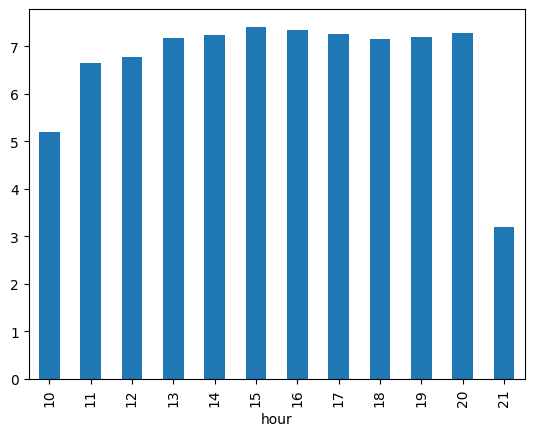

In [33]:
df.groupby(["Receipt number", "hour"]).sum("newSubtotal").groupby("hour").mean().newSubtotal.plot(kind = 'bar')